# Test Analyser

Read in the results data (from `data/results.csv` and analyse it. We use the [TAM](https://cran.r-project.org/web/packages/TAM/) package as it's capable of dealing with tests that have a mix of dichotomous and polytomous items. The goal here is to analyse a simulated test to ensure that it approximates a real world test.

We assume that the 1PL model is used.

$$
Pr(X=1) = \frac{exp(\theta-b)}{1 + exp(\theta-b)}
$$

We'll want to use the partial credit model (PCM) to analyse the data. Items are classed by the number of categories ($k$) that they contain; dichotomous items have a value of $k = 2, K = \{ 0, 1 \}$. The polytomous items have a varying number of categories.

## Data Ingest

For this analysis we need the `results.csv` file from the `data` folder.

In [1]:
library(tidyverse)
library(TAM)

dfRaw <- read_csv("data/results.csv")

dfTest <- dfRaw %>%
  dplyr::select(-systemname)

numItems <- ncol(dfTest)
numCandidates <- nrow(dfTest)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.1”
Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘tidyr’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
Warning message:
“package ‘stringr’ was built under R version 4.1.1”
Warning message:
“package ‘forcats’ was built under R version 4.1.1”
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: CDM

Loading required package: mvtnorm

Warning message:
“package ‘mvtnorm’ was built under R

In [2]:
# show a selection of data from the test...
head(dfRaw[c('systemname','A1L_7616_01#6789', 'A1L_20679_02#6790', 'A1L_5480_03#6791', 'S1', 'S2')])

systemname,A1L_7616_01#6789,A1L_20679_02#6790,A1L_5480_03#6791,S1,S2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DT0001,0,0,0,5,6
DT0002,0,0,0,0,0
DT0003,0,1,0,11,12
DT0004,0,0,0,3,7
DT0005,0,0,0,3,0
DT0006,1,1,1,11,15


## Summary Stats
We'll use the TAM package to get some summary info for the dataset. TAM will automatically run the PCM when our data is polytomous. We need to remove the systemname (candidate ID) column first.

In [3]:
dfTestResponses <- dfRaw[-c(1)]

In [4]:
pcm <- tam(dfTestResponses)

....................................................
Processing Data      2022-01-06 23:55:51 
    * Response Data: 400 Persons and  124 Items 
    * Numerical integration with 21 nodes
    * Created Design Matrices   ( 2022-01-06 23:55:51 )
    * Calculated Sufficient Statistics   ( 2022-01-06 23:55:51 )
....................................................
Iteration 1     2022-01-06 23:55:51
E Step
M Step Intercepts   |----
  Deviance = 52012.897
  Maximum item intercept parameter change: 1.298514
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 1.879782
....................................................
Iteration 2     2022-01-06 23:55:51
E Step
M Step Intercepts   |----
  Deviance = 50492.2512 | Absolute change: 1520.646 | Relative change: 0.03011642
  Maximum item intercept parameter change: 0.463814
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter c

....................................................
Iteration 22     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.9884 | Absolute change: 0.0668 | Relative change: 1.33e-06
  Maximum item intercept parameter change: 0.039425
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0.000128
....................................................
Iteration 23     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.936 | Absolute change: 0.0525 | Relative change: 1.05e-06
  Maximum item intercept parameter change: 0.037823
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 1.7e-05
....................................................
Iteration 24     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.8905 | Absolute change: 0.0454 | Relative change: 9.1e-07
  Maximum item intercept parameter chang

....................................................
Iteration 44     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.5959 | Absolute change: 0.0046 | Relative change: 9e-08
  Maximum item intercept parameter change: 0.01436
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 4.2e-05
....................................................
Iteration 45     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.5917 | Absolute change: 0.0042 | Relative change: 8e-08
  Maximum item intercept parameter change: 0.014138
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 4.1e-05
....................................................
Iteration 46     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.5877 | Absolute change: 0.0039 | Relative change: 8e-08
  Maximum item intercept parameter change: 0.0133

....................................................
Iteration 66     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.5481 | Absolute change: 9e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.006542
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 2.1e-05
....................................................
Iteration 67     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.5472 | Absolute change: 9e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.006445
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 2e-05
....................................................
Iteration 68     2022-01-06 23:55:52
E Step
M Step Intercepts   |----
  Deviance = 50077.5464 | Absolute change: 8e-04 | Relative change: 2e-08
  Maximum item intercept parameter change: 0.006112
 

....................................................
Iteration 88     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5378 | Absolute change: 2e-04 | Relative change: 0
  Maximum item intercept parameter change: 0.003161
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 1e-05
....................................................
Iteration 89     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5376 | Absolute change: 2e-04 | Relative change: 0
  Maximum item intercept parameter change: 0.003112
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 1e-05
....................................................
Iteration 90     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5374 | Absolute change: 2e-04 | Relative change: 0
  Maximum item intercept parameter change: 0.002946
  Maximum item 

M Step Intercepts   |----
  Deviance = 50077.5354 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.001558
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 5e-06
....................................................
Iteration 111     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5353 | Absolute change: 1e-04 | Relative change: 0
  Maximum item intercept parameter change: 0.001534
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 5e-06
....................................................
Iteration 112     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5353 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.001463
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change:

....................................................
Iteration 133     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5347 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000773
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 3e-06
....................................................
Iteration 134     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5347 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000738
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 3e-06
....................................................
Iteration 135     2022-01-06 23:55:53
E Step
M Step Intercepts   |----
  Deviance = 50077.5347 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000727
  Maximum item slope par

....................................................
Iteration 156     2022-01-06 23:55:54
E Step
M Step Intercepts   |--
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000287
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0
....................................................
Iteration 157     2022-01-06 23:55:54
E Step
M Step Intercepts   |--
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000278
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0
....................................................
Iteration 158     2022-01-06 23:55:54
E Step
M Step Intercepts   |--
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000266
  Maximum item slope parameter change:

....................................................
Iteration 178     2022-01-06 23:55:54
E Step
M Step Intercepts   |--
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000159
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0
....................................................
Iteration 179     2022-01-06 23:55:54
E Step
M Step Intercepts   |---
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
!!! Deviance increases!                                        !!!!
!!! Choose maybe fac.oldxsi > 0 and/or increment.factor > 1    !!!!
  Maximum item intercept parameter change: 0.000147
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0
....................................................
Iteration 180     2022-01-06 23:55:54
E Step
M Step Intercepts   |--
  Deviance = 50077.

M Step Intercepts   |--
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000129
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0
....................................................
Iteration 198     2022-01-06 23:55:54
E Step
M Step Intercepts   |---
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
!!! Deviance increases!                                        !!!!
!!! Choose maybe fac.oldxsi > 0 and/or increment.factor > 1    !!!!
  Maximum item intercept parameter change: 0.000132
  Maximum item slope parameter change: 0
  Maximum regression parameter change: 0
  Maximum variance parameter change: 0
....................................................
Iteration 199     2022-01-06 23:55:54
E Step
M Step Intercepts   |--
  Deviance = 50077.5346 | Absolute change: 0 | Relative change: 0
  Maximum item intercept parameter change: 0.000137

In [5]:
summary(pcm)

------------------------------------------------------------
TAM 3.7-16 (2021-06-24 14:31:37) 
R version 4.1.0 (2021-05-18) aarch64, darwin20 | nodename=James-Page-MacBook-Pro.local | login=jamespage 

Date of Analysis: 2022-01-06 23:55:54 
Time difference of 3.005838 secs
Computation time: 3.005838 

Multidimensional Item Response Model in TAM 

IRT Model: 1PL
Call:
tam.mml(resp = resp)

------------------------------------------------------------
Number of iterations = 201 
Numeric integration with 21 integration points

Deviance = 50077.53 
Log likelihood = -25038.77 
Number of persons = 400 
Number of persons used = 400 
Number of items = 124 
Number of estimated parameters = 253 
    Item threshold parameters = 252 
    Item slope parameters = 0 
    Regression parameters = 0 
    Variance/covariance parameters = 1 

AIC = 50584  | penalty=506    | AIC=-2*LL + 2*p 
AIC3 = 50837  | penalty=759    | AIC3=-2*LL + 3*p 
BIC = 51593  | penalty=1515.84    | BIC=-2*LL + log(n)*p 
aBIC = 5

## Item Difficulties
We can extract the item difficulties and use them to update the item bank if we wish.

In [6]:
dfItemUpdates <- pcm$item

In [7]:
head(dfItemUpdates[, c('item', 'N', 'M', 'xsi.item')])

,item,N,M,xsi.item
,<chr>,<dbl>,<dbl>,<dbl>
A1L_7616_01#6789,A1L_7616_01#6789,400,0.4125,0.3567358
A1L_20679_02#6790,A1L_20679_02#6790,400,0.4300,0.2298156
A1L_5480_03#6791,A1L_5480_03#6791,400,0.4400,0.1578832
A2L_5483_04#6792,A2L_5483_04#6792,400,0.3825,0.5777725
A2L_24442_05#6793,A2L_24442_05#6793,400,0.3525,0.8039434
A2L_7620_06#6794,A2L_7620_06#6794,400,0.4125,0.3567358


Here, `N` is the number of responses, `M` is the ratio of correct responses and `xsi.item` is the item difficulty (or $b$ parameter).

In [8]:
# read in items.csv and create a joined dataset using the new
# item difficulties calculated from the test response analysis
dfItems <- read_csv("data/items.csv") %>%
  select(-c(b, se)) %>%
  left_join(dfItemUpdates, by = c("UIID" = "item")) %>%
  select(c(UIID, a, b = xsi.item, rating, k))

# then write out to a new items file
write_csv(dfItems, 'data/updated-items.csv')

Rows: 124 Columns: 6

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UIID, rating
dbl (4): a, b, se, k


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



## Item Fit
We can calulcate the infit and outfit statistics. For polytomous items, the statistics are produced for each level.

In [9]:
Fit.poly <- tam.fit(pcm)

Item fit calculation based on 40 simulations
|**********|
|----------|


In [10]:
(Fit.poly$itemfit)

parameter,Outfit,Outfit_t,Outfit_p,Outfit_pholm,Infit,Infit_t,Infit_p,Infit_pholm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1L_7616_01#6789_Cat1,0.4687816,-9.036926,1.611396e-19,2.014245e-17,0.6430850,-5.5317194,3.171069e-08,5.327396e-06
A1L_20679_02#6790_Cat1,0.5525383,-7.296831,2.946247e-13,3.417647e-11,0.7260381,-4.1056176,4.032360e-05,5.725952e-03
A1L_5480_03#6791_Cat1,0.7413747,-3.864123,1.114888e-04,2.564243e-03,0.8479634,-2.1657279,3.033198e-02,1.000000e+00
A2L_5483_04#6792_Cat1,0.8255236,-2.514560,1.191811e-02,9.534490e-02,0.8788970,-1.6772961,9.348459e-02,1.000000e+00
A2L_24442_05#6793_Cat1,0.6167453,-5.974986,2.301095e-09,1.794854e-07,0.7960421,-2.9273237,3.418929e-03,3.035298e-01
A2L_7620_06#6794_Cat1,0.5673496,-6.967237,3.232255e-12,3.490836e-10,0.7189842,-4.2039880,2.622529e-05,3.776441e-03
A2L_7627_07#6795_Cat1,0.5285655,-7.720869,1.155391e-14,1.386469e-12,0.6959118,-4.5801961,4.645401e-06,7.061010e-04
B1L_20849_08#6796_Cat1,0.8914499,-1.491770,1.357593e-01,5.430373e-01,0.9833583,-0.2001895,8.413324e-01,1.000000e+00
B1L_4287_09#6797_Cat1,0.6359095,-5.634074,1.760018e-08,1.232013e-06,0.8000302,-2.8699175,4.105789e-03,3.530979e-01


## Item Information Functions
If we're interested we can get Item Characteristic Curves (ICCs) and Item Information Functions (IIFs) for the polytomous item thresholds. Here we'll show the ICCs and IIFs for items S1 (item 113) and W1 (item 123).

Iteration in WLE/MLE estimation  1   | Maximal change  1.8435 
Iteration in WLE/MLE estimation  2   | Maximal change  0.4829 
Iteration in WLE/MLE estimation  3   | Maximal change  0.2314 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0575 
Iteration in WLE/MLE estimation  5   | Maximal change  0.006 
Iteration in WLE/MLE estimation  6   | Maximal change  4e-04 
Iteration in WLE/MLE estimation  7   | Maximal change  0 
----
 WLE Reliability= 0.986 


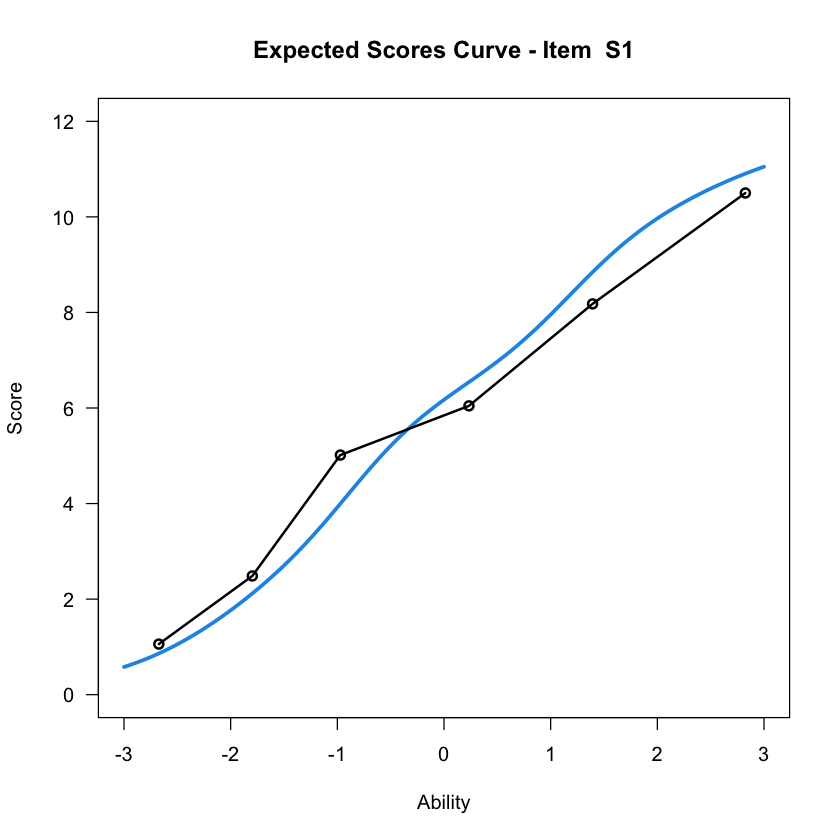

In [11]:
plot(pcm, items=113, type='expected', export=FALSE)

Iteration in WLE/MLE estimation  1   | Maximal change  1.8435 
Iteration in WLE/MLE estimation  2   | Maximal change  0.4829 
Iteration in WLE/MLE estimation  3   | Maximal change  0.2314 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0575 
Iteration in WLE/MLE estimation  5   | Maximal change  0.006 
Iteration in WLE/MLE estimation  6   | Maximal change  4e-04 
Iteration in WLE/MLE estimation  7   | Maximal change  0 
----
 WLE Reliability= 0.986 


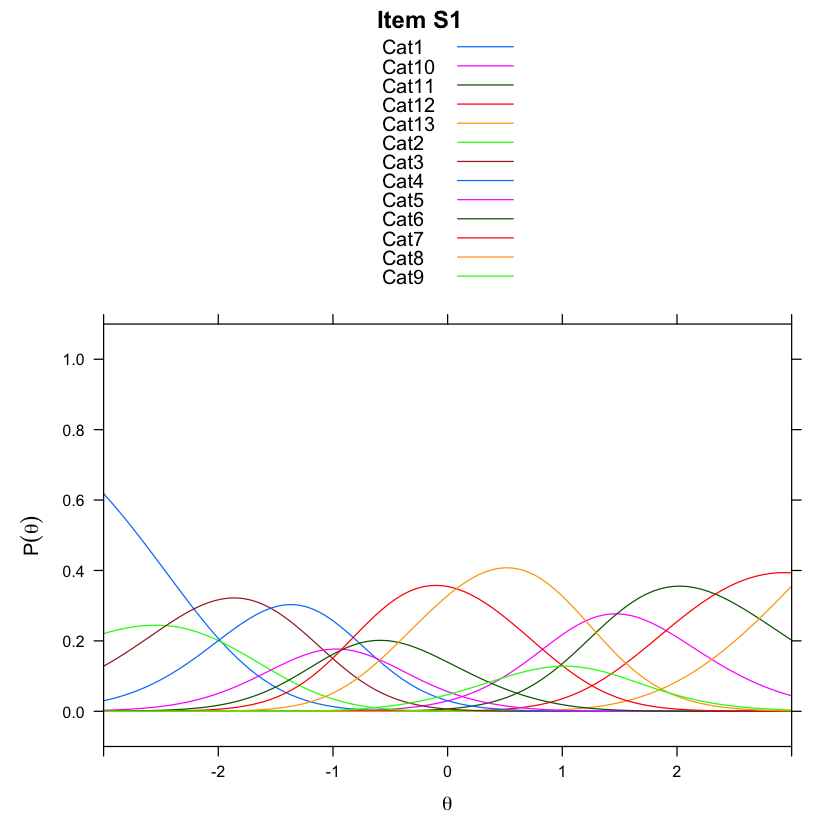

In [12]:
plot(pcm, items=113, type='items', export=FALSE)

Iteration in WLE/MLE estimation  1   | Maximal change  1.8435 
Iteration in WLE/MLE estimation  2   | Maximal change  0.4829 
Iteration in WLE/MLE estimation  3   | Maximal change  0.2314 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0575 
Iteration in WLE/MLE estimation  5   | Maximal change  0.006 
Iteration in WLE/MLE estimation  6   | Maximal change  4e-04 
Iteration in WLE/MLE estimation  7   | Maximal change  0 
----
 WLE Reliability= 0.986 


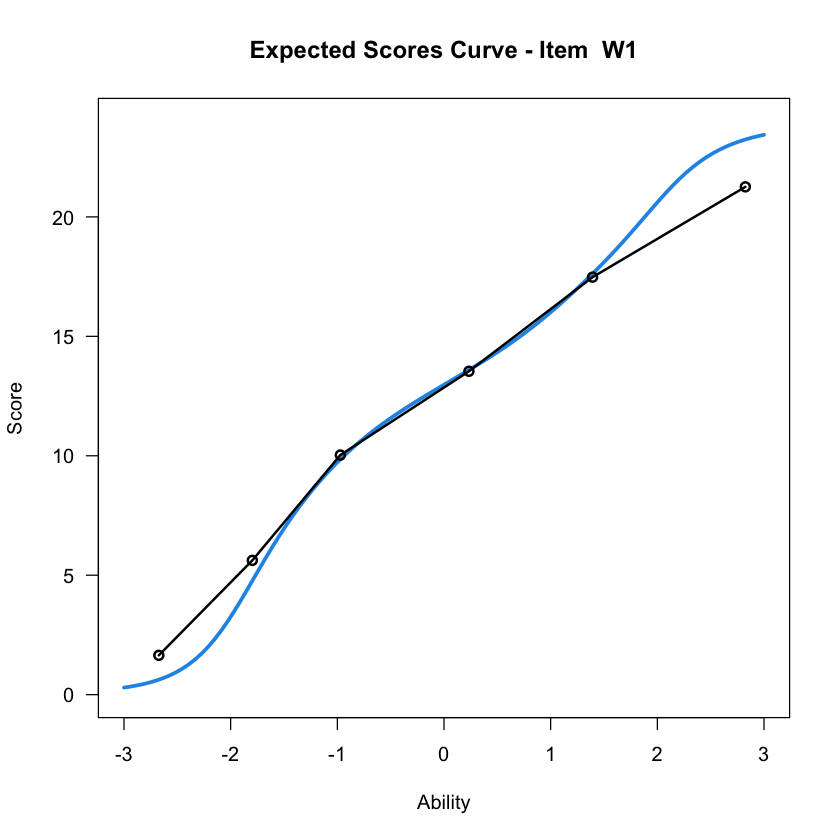

In [13]:
plot(pcm, items=123, type='expected', export=FALSE)

Iteration in WLE/MLE estimation  1   | Maximal change  1.8435 
Iteration in WLE/MLE estimation  2   | Maximal change  0.4829 
Iteration in WLE/MLE estimation  3   | Maximal change  0.2314 
Iteration in WLE/MLE estimation  4   | Maximal change  0.0575 
Iteration in WLE/MLE estimation  5   | Maximal change  0.006 
Iteration in WLE/MLE estimation  6   | Maximal change  4e-04 
Iteration in WLE/MLE estimation  7   | Maximal change  0 
----
 WLE Reliability= 0.986 


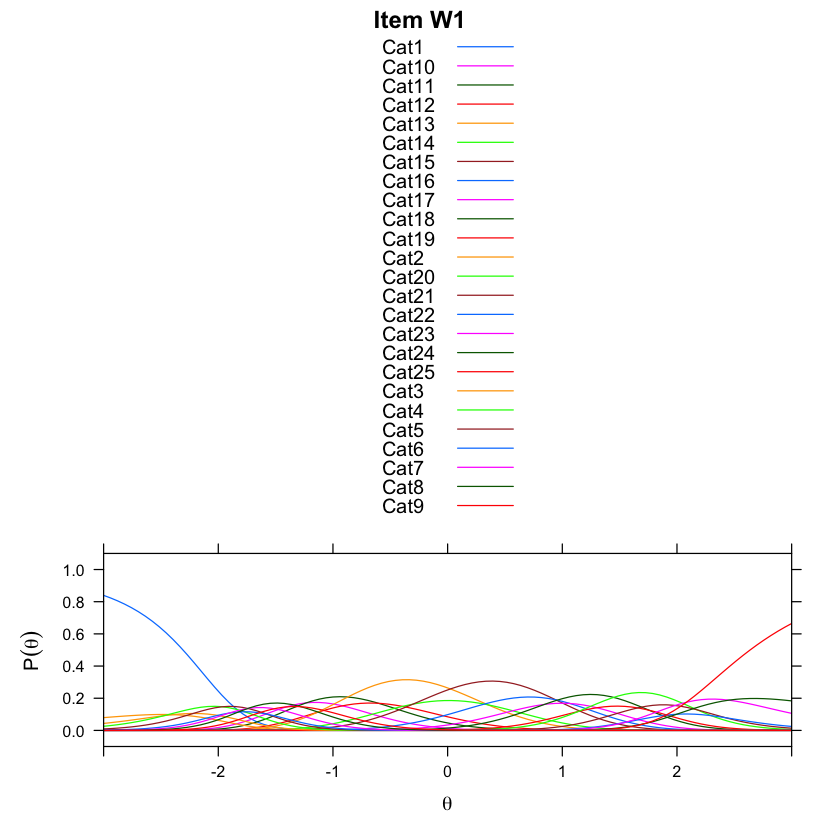

In [14]:
plot(pcm, items=123, type='items', export=FALSE)